#공공 전력 사업체 분석
* 규제 완화에 대한 상세한 비용 예측 모형 구축의 필요성
* 군집화를 통한 군집별로 대표적 사업체를 대상으로만 모형 구축
* 시간과 노력 감소

In [ ]:
#폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,931 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

##1. Data Load

| 변수 명      | 설명                |
| ------------ | ------------------- |
| Company      | 기업명              |
| Fixed_charge | 고정비 부담율       |
| RoR          | 투자수익률          |
| Cost         | 킬로와트당 생산비용 |
| Load         | 연간 부하량         |
| Demand       | 최대 전력 수요      |
| Sales        | 전력 판매량         |
| Nuclear      | 원자력 발전 비율    |
| Fuel_cost    | 총 연료 비용        |



In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hrbae/DRB_ML_Training/main/2022/week7/data/public%20utilites.csv')

df

,기업명,고정비 부담율,투자수익률,킬로와트당비용,연간 부하량,최대전력 수요량,전력 판매 매출,원자력 비율,연료비
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,Con Ed NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기업명       22 non-null     object 
 1   고정비 부담율   22 non-null     float64
 2   투자수익률     22 non-null     float64
 3   킬로와트당비용   22 non-null     int64  
 4   연간 부하량    22 non-null     float64
 5   최대전력 수요량  22 non-null     float64
 6   전력 판매 매출  22 non-null     int64  
 7   원자력 비율    22 non-null     float64
 8   연료비       22 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.7+ KB


In [ ]:
df.describe()

,고정비 부담율,투자수익률,킬로와트당비용,연간 부하량,최대전력 수요량,전력 판매 매출,원자력 비율,연료비
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000
mean,1.114091,10.736364,168.181818,56.977273,3.240909,8914.045455,12.00000,1.102727
std,0.184511,2.244049,41.191349,4.461148,3.118250,3549.984031,16.79192,0.556098
min,0.750000,6.400000,96.000000,49.800000,-2.200000,3300.000000,0.00000,0.309000
25%,1.042500,9.200000,148.500000,53.775000,1.450000,6458.250000,0.00000,0.630000
50%,1.110000,11.050000,170.500000,56.350000,3.000000,8024.000000,0.00000,0.960000
75%,1.190000,12.350000,195.750000,60.300000,5.350000,10128.250000,24.60000,1.516250
max,1.490000,15.400000,252.000000,67.600000,9.200000,17441.000000,50.20000,2.116000


##2. 탐색적 데이터 분석(EDA)

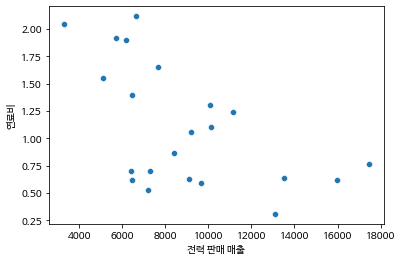

In [ ]:
sns.scatterplot(data = df, x = '전력 판매 매출', y = '연료비')

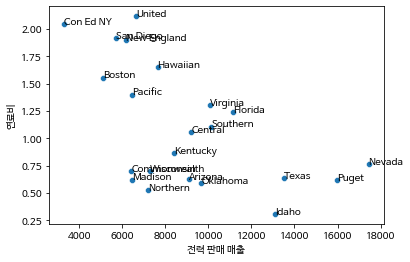

In [ ]:
sns.scatterplot(data = df, x = '전력 판매 매출', y = '연료비')

for i in range(len(df)):
  name = df.loc[i, '기업명']
  x= df.loc[i, '전력 판매 매출']
  y = df.loc[i, '연료비']

  plt.text(x,y, name)
plt.show()



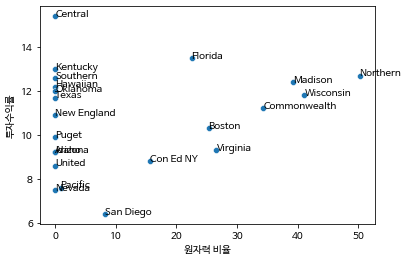

In [ ]:
sns.scatterplot(data = df, x = '원자력 비율', y = '투자수익률')
for i in range(len(df)):
    name = df.loc[i, '기업명'] 
    x = df.loc[i, '원자력 비율']
    y = df.loc[i, '투자수익률']
    
    plt.text(x, y, name)
plt.show()

##3. 데이터 전처리


###3-1. 변수 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df_scaled.iloc[:,1: ])

df_scaled

,기업명,고정비 부담율,투자수익률,킬로와트당비용,연간 부하량,최대전력 수요량,전력 판매 매출,원자력 비율,연료비
0,Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
1,Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
2,Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
3,Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
4,Con Ed NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
5,Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
6,Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
7,Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
8,Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073
9,Madison,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


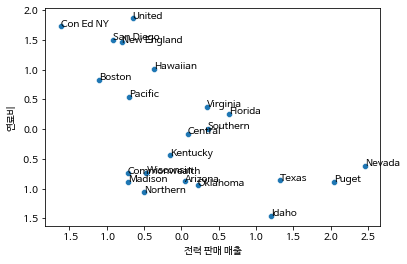

In [ ]:
sns.scatterplot(data = df_scaled, x = '전력 판매 매출', y = '연료비')
for i in range(len(df)):
    name = df_scaled.loc[i, '기업명'] 
    x = df_scaled.loc[i, '전력 판매 매출']
    y = df_scaled.loc[i, '연료비']
    
    plt.text(x, y, name)
plt.show()

##4. 클러스터링(군집 분석)
###4-1. 계층적 클러스터링

* 거리척도

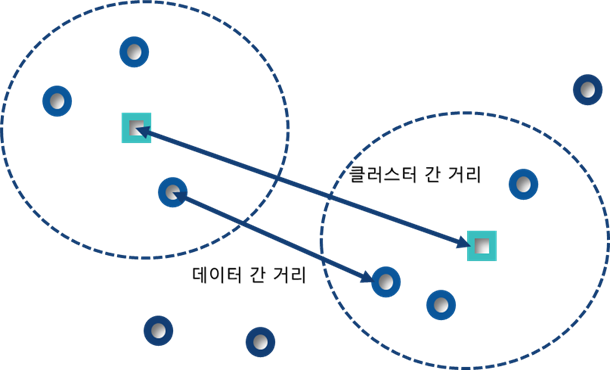

In [ ]:
from scipy.spatial.distance import pdist, squareform

#데이터 간 거리 측정
distmatrix = pdist(df_scaled[['전력 판매 매출', '연료비']], metric = 'euclidean')

distmatrix

array([2.0576376 , 0.79239794, 0.77659261, 3.09301997, 1.27370639,
       1.92961291, 1.29542174, 0.47214718, 0.75603197, 2.42523926,
       2.48306475, 0.57794504, 0.1869462 , 1.60774422, 1.99350127,
       2.56808776, 0.93512088, 1.27734401, 0.53376332, 2.82673587,
       1.28182134, 1.50019458, 1.6200687 , 1.03721728, 1.83457663,
       0.75770415, 3.251409  , 1.59439538, 1.76009934, 3.84491371,
       0.70049889, 1.98582303, 2.21705165, 0.48959047, 3.58378732,
       0.69562773, 1.67288775, 2.95858261, 1.69318435, 1.12649481,
       1.51407159, 1.03961271, 2.48977225, 0.64676187, 1.18329807,
       1.77355383, 0.42911995, 1.12822687, 2.43188759, 1.77820566,
       1.13963492, 0.87521542, 1.01101679, 2.11425308, 1.87998596,
       0.28294559, 1.46176774, 0.85870994, 2.08270854, 0.52237555,
       2.63249455, 1.68254087, 1.78711536, 2.05037132, 0.64481911,
       0.14202323, 3.17917817, 2.2045167 , 0.38587623, 0.95944826,
       1.28845829, 2.76257595, 2.25477039, 1.30860113, 2.04585

In [ ]:
data_dist = pd.DataFrame(squareform(distmatrix))

data_dist

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.000000,2.057638,0.792398,0.776593,3.093020,1.273706,1.929613,1.295422,0.472147,0.756032,...,0.577945,0.186946,1.607744,1.993501,2.568088,0.935121,1.277344,0.533763,2.826736,1.281821
1,2.057638,0.000000,1.500195,1.620069,1.037217,1.834577,0.757704,3.251409,1.594395,1.760099,...,1.985823,2.217052,0.489590,3.583787,0.695628,1.672888,2.958583,1.693184,1.126495,1.514072
2,0.792398,1.500195,0.000000,1.039613,2.489772,0.646762,1.183298,1.773554,0.429120,1.128227,...,1.139635,0.875215,1.011017,2.114253,1.879986,0.282946,1.461768,0.858710,2.082709,0.522376
3,0.776593,1.620069,1.039613,0.000000,2.632495,1.682541,1.787115,2.050371,0.644819,0.142023,...,0.385876,0.959448,1.288458,2.762576,2.254770,1.308601,2.045855,0.249136,2.607057,1.537441
4,3.093020,1.037217,2.489772,2.632495,0.000000,2.697595,1.444916,4.260518,2.626834,2.769112,...,3.007791,3.249295,1.496424,4.500916,0.732470,2.618615,3.921288,2.724425,0.974922,2.383491
5,1.273706,1.834577,0.646762,1.682541,2.697595,0.000000,1.257722,1.805638,1.049799,1.763045,...,1.738597,1.272900,1.374793,1.809177,1.999392,0.375374,1.307992,1.486597,2.063946,0.321233
6,1.929613,0.757704,1.183298,1.787115,1.444916,1.257722,0.000000,2.927497,1.470634,1.924610,...,2.074930,2.044032,0.574199,3.066348,0.743182,1.233392,2.521193,1.751526,0.900641,0.951286
7,1.295422,3.251409,1.773554,2.050371,4.260518,1.805638,2.927497,0.000000,1.689256,1.996192,...,1.748613,1.108946,2.769248,1.015439,3.647591,1.697704,0.614211,1.820673,3.807973,2.027326
8,0.472147,1.594395,0.429120,0.644819,2.626834,1.049799,1.470634,1.689256,0.000000,0.714092,...,0.710868,0.622718,1.136995,2.231809,2.096295,0.674504,1.528415,0.436823,2.362941,0.951006
9,0.756032,1.760099,1.128227,0.142023,2.769112,1.763045,1.924610,1.996192,0.714092,0.000000,...,0.273486,0.930049,1.430121,2.749428,2.396749,1.387691,2.033376,0.280510,2.748533,1.637229


In [ ]:
data_dist = pd.DataFrame(squareform(distmatrix),
                        index = df['기업명'],
                        columns = df['기업명'])

data_dist

기업명,Arizona,Boston,Central,Commonwealth,Con Ed NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
기업명,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,2.057638,0.792398,0.776593,3.093020,1.273706,1.929613,1.295422,0.472147,0.756032,...,0.577945,0.186946,1.607744,1.993501,2.568088,0.935121,1.277344,0.533763,2.826736,1.281821
Boston,2.057638,0.000000,1.500195,1.620069,1.037217,1.834577,0.757704,3.251409,1.594395,1.760099,...,1.985823,2.217052,0.489590,3.583787,0.695628,1.672888,2.958583,1.693184,1.126495,1.514072
Central,0.792398,1.500195,0.000000,1.039613,2.489772,0.646762,1.183298,1.773554,0.429120,1.128227,...,1.139635,0.875215,1.011017,2.114253,1.879986,0.282946,1.461768,0.858710,2.082709,0.522376
Commonwealth,0.776593,1.620069,1.039613,0.000000,2.632495,1.682541,1.787115,2.050371,0.644819,0.142023,...,0.385876,0.959448,1.288458,2.762576,2.254770,1.308601,2.045855,0.249136,2.607057,1.537441
Con Ed NY,3.093020,1.037217,2.489772,2.632495,0.000000,2.697595,1.444916,4.260518,2.626834,2.769112,...,3.007791,3.249295,1.496424,4.500916,0.732470,2.618615,3.921288,2.724425,0.974922,2.383491
Florida,1.273706,1.834577,0.646762,1.682541,2.697595,0.000000,1.257722,1.805638,1.049799,1.763045,...,1.738597,1.272900,1.374793,1.809177,1.999392,0.375374,1.307992,1.486597,2.063946,0.321233
Hawaiian,1.929613,0.757704,1.183298,1.787115,1.444916,1.257722,0.000000,2.927497,1.470634,1.924610,...,2.074930,2.044032,0.574199,3.066348,0.743182,1.233392,2.521193,1.751526,0.900641,0.951286
Idaho,1.295422,3.251409,1.773554,2.050371,4.260518,1.805638,2.927497,0.000000,1.689256,1.996192,...,1.748613,1.108946,2.769248,1.015439,3.647591,1.697704,0.614211,1.820673,3.807973,2.027326
Kentucky,0.472147,1.594395,0.429120,0.644819,2.626834,1.049799,1.470634,1.689256,0.000000,0.714092,...,0.710868,0.622718,1.136995,2.231809,2.096295,0.674504,1.528415,0.436823,2.362941,0.951006


* 군집 간 거리

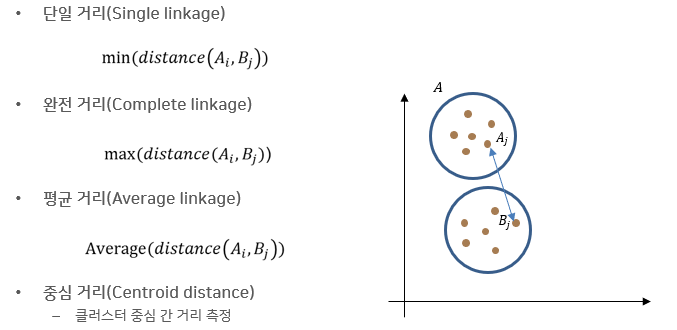

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

#군집간 거리 측정
linked = linkage(distmatrix, method = 'single', metric = 'euclidean') 

linked

array([[11.        , 16.        ,  0.13373772,  2.        ],
       [ 3.        ,  9.        ,  0.14202323,  2.        ],
       [ 0.        , 13.        ,  0.1869462 ,  2.        ],
       [19.        , 23.        ,  0.24913598,  3.        ],
       [12.        , 25.        ,  0.27348631,  4.        ],
       [ 2.        , 17.        ,  0.28294559,  2.        ],
       [ 5.        , 21.        ,  0.32123256,  2.        ],
       [27.        , 28.        ,  0.36468301,  4.        ],
       [20.        , 22.        ,  0.42769946,  3.        ],
       [ 8.        , 29.        ,  0.42911995,  5.        ],
       [26.        , 31.        ,  0.43682339,  9.        ],
       [24.        , 32.        ,  0.47214718, 11.        ],
       [ 1.        , 14.        ,  0.48959047,  2.        ],
       [10.        , 15.        ,  0.49898033,  2.        ],
       [ 6.        , 34.        ,  0.57419904,  3.        ],
       [ 7.        , 18.        ,  0.61421077,  2.        ],
       [30.        , 36.

In [ ]:
dist = pd.DataFrame(linked, columns =['data1', 'data2', '거리', '멤버수'] )

dist

,data1,data2,거리,멤버수
0,11.0,16.0,0.133738,2.0
1,3.0,9.0,0.142023,2.0
2,0.0,13.0,0.186946,2.0
3,19.0,23.0,0.249136,3.0
4,12.0,25.0,0.273486,4.0
5,2.0,17.0,0.282946,2.0
6,5.0,21.0,0.321233,2.0
7,27.0,28.0,0.364683,4.0
8,20.0,22.0,0.427699,3.0
9,8.0,29.0,0.429120,5.0


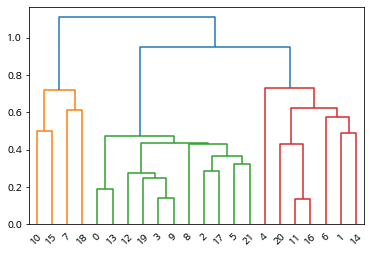

In [ ]:
dend = dendrogram(dist)

###4-2. 비계층적 군집분석
* K-Means clustering 알고리즘 수행 과정
  1. 나누고자 하는 클러스터의 수 K 설정(사용자 설정)
  2. K개의 클러스터로 시작하여 분할 시작
  3. 각각의 데이터는 K개 클러스터의 중심과 거리가 가장 가까운 클러스터에 할당 됨
  4. 3에서 만들어진 클러스터의 중심을 새롭게 계산
  5. K개 클러스터의 중심이 변하지 않을 때 까지 3~4과정 반복





In [ ]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters= 3)


In [ ]:
result = clf.fit_predict(df_scaled[['전력 판매 매출', '연료비']])

result

array([0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 0],
      dtype=int32)

In [ ]:
df_scaled['result'] = result

df_scaled

,기업명,고정비 부담율,투자수익률,킬로와트당비용,연간 부하량,최대전력 수요량,전력 판매 매출,원자력 비율,연료비,result
0,Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765,0
1,Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436,1
2,Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323,0
3,Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244,0
4,Con Ed NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,1
5,Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499,0
6,Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970,1
7,Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904,2
8,Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073,0
9,Madison,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


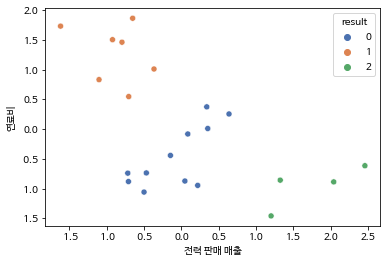

In [ ]:
sns.scatterplot(data = df_scaled, x = '전력 판매 매출', y = '연료비', hue = 'result', palette='deep' )


In [ ]:
df['result'] = result

for i in range(3):
  temp = df[df['result']==i]

  avg1 = temp['전력 판매 매출'].mean()
  avg2 = temp['연료비'].mean()

  print(f"군집 {i}의 평균 전력 판매 매출: {avg1}")
  print(f"군집 {i}의 평균 연료비: {avg2}")

군집 0의 평균 전력 판매 매출: 8642.90909090909
군집 0의 평균 연료비: 0.8493636363636363
군집 1의 평균 전력 판매 매출: 5859.428571428572
군집 1의 평균 연료비: 1.7977142857142856
군집 2의 평균 전력 판매 매출: 15005.25
군집 2의 평균 연료비: 0.58325


* DBSCAN

  1. $\epsilon$(반경)과 최소 개체 수(MinPts) 설정
  2. Core Point의 조건을 만족하는 임의 점 선택
  3. Core Point와 Border Point를 구분하고, 이에 속하지 않는 점들을 noise point로 구분
  4. $\epsilon$ 내에 있는 Core Point들을 서로 연결
  5. 연결된 Core Point들을 하나의 클러스터로 묶음
  6. 모든 Border Point들은 어느 하나의 클러스터에 할당(여러 클러스터에 걸쳐져있는 경우, 반복 과정에서 먼저 할당된 클러스터로 할당)
  7. $\epsilon$ 내에 더 이상 Core Point가 없을 때 까지 반복

In [ ]:
from sklearn.cluster import DBSCAN

clf2 = DBSCAN(eps = 1, min_samples = 2)

In [ ]:
result2 = clf2.fit_predict(df_scaled[['전력 판매 매출', '연료비']])

result2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
df_scaled['result2'] = result2

df_scaled

,기업명,고정비 부담율,투자수익률,킬로와트당비용,연간 부하량,최대전력 수요량,전력 판매 매출,원자력 비율,연료비,result,result2
0,Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765,0,0
1,Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436,1,0
2,Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323,0,0
3,Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244,0,0
4,Con Ed NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470,1,0
5,Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499,0,0
6,Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970,1,0
7,Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904,2,1
8,Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073,0,0
9,Madison,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967,0,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


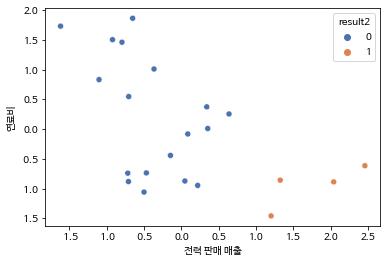

In [ ]:
sns.scatterplot(data = df_scaled, x = '전력 판매 매출', y = '연료비', hue = 'result2', palette='deep' )


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


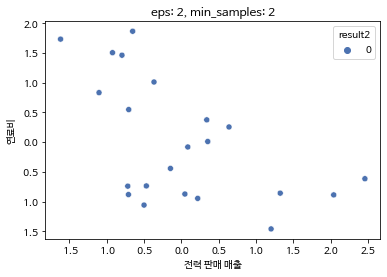

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


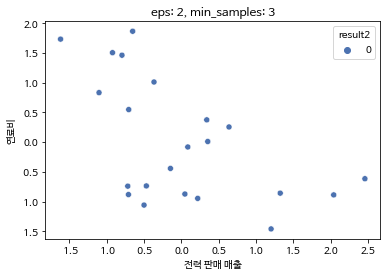

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


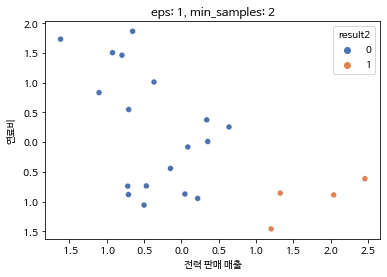

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


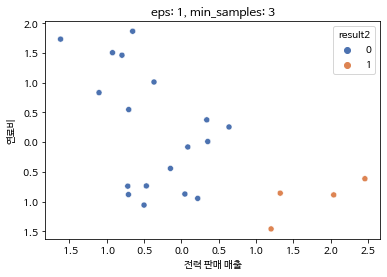

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


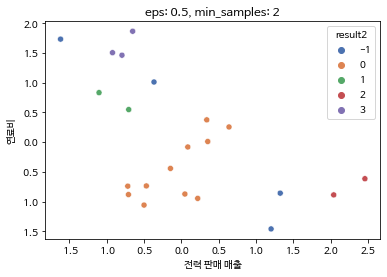

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


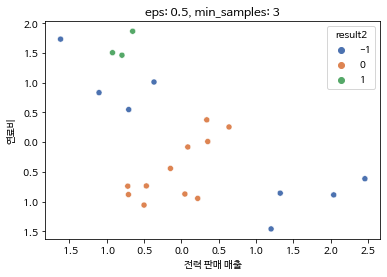

In [ ]:
eps_list = [2, 1, 0.5]
min_list = [2,3]

for eps in eps_list:
  for min in min_list:
    clf2 = DBSCAN(eps = eps, min_samples = min )
    result2 = clf2.fit_predict(df_scaled[['전력 판매 매출', '연료비']])

    df_scaled['result2'] = result2

    sns.scatterplot(data = df_scaled, x='전력 판매 매출', y='연료비', hue='result2', palette='deep')
    plt.title(f"eps: {eps}, min_samples: {min}")
    plt.show()

